<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/datos_academicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
### Drive connection

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import pandas as pd
import numpy as np
from sympy import Matrix
import plotly.express as px
import matplotlib.pyplot as plt


In [118]:
### Carga de archivo de estudiantes
df = pd.read_csv('/content/drive/MyDrive/Programacion_ClassFiles/datos_academicos.csv')
#df['Index_col'] = df.index
#print(df)

### Se define un arreglo de los pesos por materia
peso = df['Peso'].to_numpy()
peso = np.reshape(peso, (10,1))
#print(peso)

### en un DF de nombre estudiantes, se guardan solo las calificaciones de cada alumno
estudiantes = df[[ '202501', '202502', '202503', '202504', '202505', '202506', '202507', '202508', '202509', '202510']]
#print(estudiantes)


#estudiantes_2 = estudiantes.pivot_table( columns= 'Asignatura',values= ['202501', '202502', '202503', '202504', '202505', '202506', '202507', '202508', '202509', '202510'])


### se hace la transpuesta de la matriz estudiantes para poder comparla con el peso por materia correspondiente
estudiantes_2 = estudiantes.to_numpy().T
#print(estudiantes_2)

### calculo de promedios considerando su peso por materia
avg_peso = np.matmul(estudiantes_2,peso)
print(f'El promedio de cada alumno es: \n {avg_peso}')


El promedio de cada alumno es: 
 [[6.1549]
 [4.8906]
 [6.9359]
 [7.3929]
 [6.8736]
 [6.0227]
 [6.0924]
 [6.6626]
 [6.1291]
 [5.5493]]


In [116]:
### calculo de promedios sin considerar su peso por materia
peso2 = np.full((10,1), 0.1)
avg_gral = np.matmul(estudiantes_2, peso2)
print(f'El promedio de cada alumno es: \n {avg_gral}')

El promedio de cada alumno es: 
 [[5.671]
 [4.642]
 [7.156]
 [7.346]
 [6.667]
 [5.866]
 [5.923]
 [6.613]
 [6.26 ]
 [5.132]]


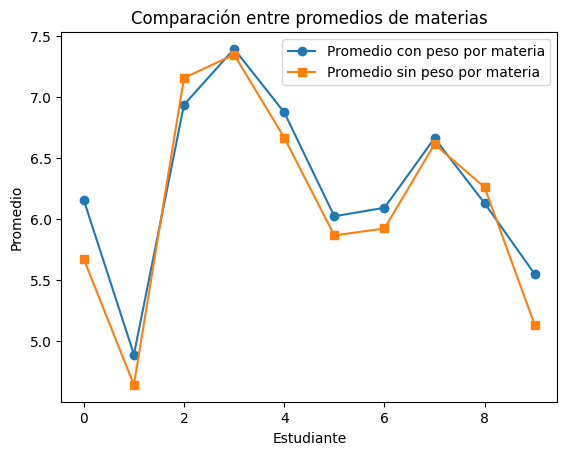

In [123]:
### comparcion de promedios

avg_peso2 = np.array(avg_peso).flatten()
avg_gral2 = np.array(avg_gral).flatten()

x = np.arange(len(avg_peso2))

plt.plot(x, avg_peso2, label='Promedio con peso por materia', marker='o')
plt.plot(x, avg_gral2, label='Promedio sin peso por materia', marker='s')


plt.title('Comparación entre promedios de materias')
plt.xlabel('Estudiante')
plt.ylabel('Promedio')
plt.legend()


In [88]:
### Calculo de rango
rango = np.linalg.matrix_rank(estudiantes_2)

print(f'rango de la matriz de estudiantes: {rango} \n')
print(f'numero de columnas: {estudiantes_2.shape[1]} \n')


rango de la matriz de estudiantes: 6 

numero de columnas: 10 



In [95]:

print('Analizando dependencias con RREF \n')
rref_matrix, pivot_indices = Matrix(estudiantes_2).rref()

print('Reduced row echelon form (RREF): \n')
print(np.array(rref_matrix.tolist()))

print('\n Pivot column indices(independent):')
print(pivot_indices)


materias = df['Asignatura'].to_numpy()
pivot_columns = [materias[i] for i in pivot_indices]
print('\nColumnas independientes: \n', pivot_columns)

Analizando dependencias con RREF 

Reduced row echelon form (RREF): 

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]

 Pivot column indices(independent):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

Columnas independientes: 
 ['Literatura', 'Historia', 'Matemáticas', 'Física', 'Química', 'Sociedad', 'Lenguas extranjeras', 'Matemáticas Aplicadas', 'Proyecto social', 'Desarrollo físico']
